In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/vgsales.csv.zip', compression='zip')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Analisando dos Gêneros da Nintendo

In [4]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [6]:
nintendo = df[df['Publisher'] == 'Nintendo']

In [7]:
ser = nintendo['Genre'].value_counts()
ser.index

Index(['Platform', 'Role-Playing', 'Misc', 'Action', 'Puzzle', 'Sports',
       'Racing', 'Adventure', 'Strategy', 'Simulation', 'Shooter', 'Fighting'],
      dtype='object')

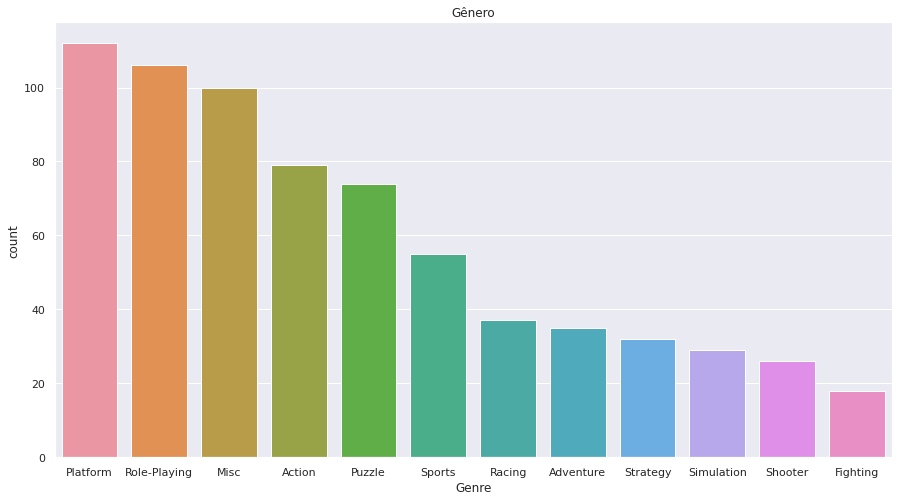

In [8]:
#nintendo['Genre'].value_counts().plot.bar()
plt.figure(figsize=(15,8))
sns.set()
ax = sns.countplot(x='Genre', data=nintendo, order=ser.index)
ax.set_title('Gênero')
plt.show()

Vendas nos ***EUA*** por Gênero

In [12]:
valores = []
key = []
for jogos in ser.index:
    tem =nintendo.query('Genre == @jogos')
    valores.append(tem['EU_Sales'].sum())
    key.append(jogos)
vendas_EU = pd.DataFrame({'genre':key, 'sales_total_EU':valores})
vendas_EU

,genre,sales_total_EU
0,Platform,85.21
1,Role-Playing,63.92
2,Misc,51.62
3,Action,29.02
4,Puzzle,26.42
5,Sports,66.18
6,Racing,39.75
7,Adventure,7.66
8,Strategy,4.42
9,Simulation,26.05


In [27]:
 vendas_EU = vendas_EU.sort_values(by=['sales_total_EU'])

Text(0.5, 1.0, 'vendas total por gênero nos EUA')

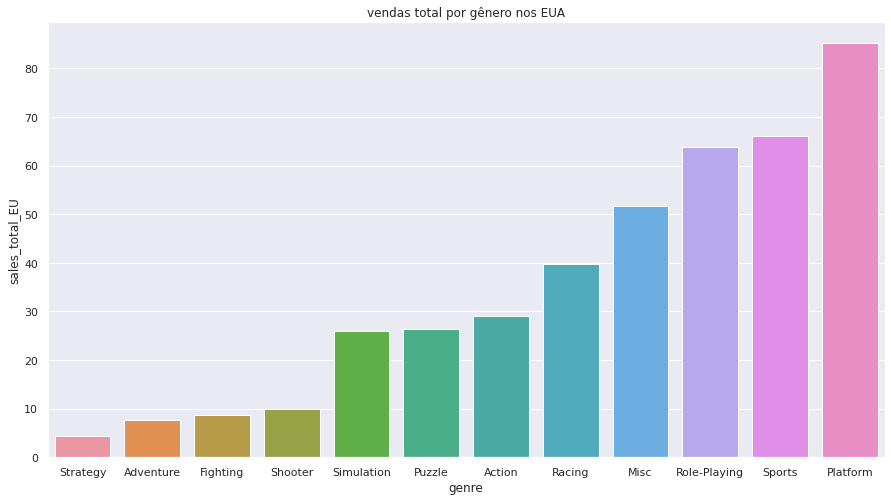

In [28]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='genre', y='sales_total_EU', data=vendas_EU)
ax.set_title('vendas total por gênero nos EUA')